## This code is part of Assignment for GWAR DATA 270 Project - Eshita Gupta/016978741

### Part I: Implementing K-Nearest Neighbors in Python using NumPy:

#### 1.Import NumPy and any other needed libraries.

In [426]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#### 2.Generate dataset using the attached script (gen_data.py ). The dataset has 50 examples with 2features labeled into 2 classes.

In [427]:
# setting a seed for reproducibility
#np.random.seed(42)

# Generate 50 random samples with 2 feature columns
X = np.random.rand(50, 2)

# Generate class labels 0 and 1 randomly
y = np.random.randint(0, 2, size=50)

In [428]:
# Create dataframe from features and labels
df = pd.DataFrame(X, columns=['Feature1', 'Feature2']) 
df['Class'] = y

display(df.head())

,Feature1,Feature2,Class
0,0.276617,0.847405,0
1,0.837907,0.770314,1
2,0.293986,0.491754,0
3,0.021166,0.717804,1
4,0.303209,0.340449,1


In [429]:
df['Class'].value_counts()

Class
1    30
0    20
Name: count, dtype: int64

In [430]:
# Split the data into training and test sets
X1 = df[['Feature1', 'Feature2']]   
y1 = df['Class']    

In [431]:
# Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [432]:
y_train.value_counts()

Class
1    19
0    16
Name: count, dtype: int64

In [433]:
display(X_test.head())

,Feature1,Feature2
13,0.118664,0.442241
39,0.429804,0.025471
30,0.281723,0.037250
45,0.676567,0.197761
17,0.857280,0.677081


In [434]:
display(y_test.head())

13    1
39    0
30    1
45    1
17    0
Name: Class, dtype: int64

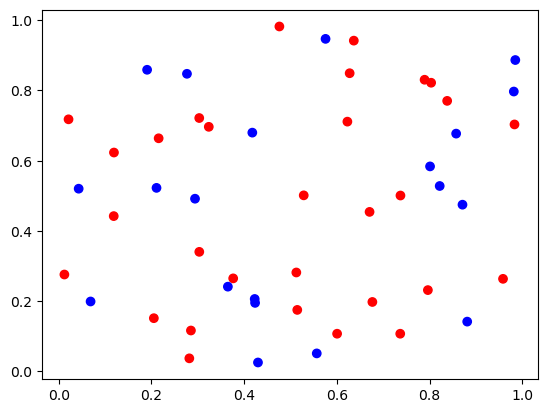

In [435]:
# visualize the data
plt.scatter(df['Feature1'], df['Feature2'], c=df['Class'], cmap='bwr')

In [436]:
# Export to CSV
df.to_csv('GWAR_HW2.csv', index=False)
print("CSV file generated with 50 examples, 2 features, and 2 class labels")

CSV file generated with 50 examples, 2 features, and 2 class labels


#### 3.Load the provided dataset into a NumPy array.Define a function to calculate the Euclidean distancebetween two data points.

In [437]:
data = pd.read_csv('GWAR_HW2.csv')

# Load the dataset into numpy array
dataset = np.genfromtxt('GWAR_HW2.csv', delimiter=',', skip_header=1)
dataset.shape

(50, 3)

#### Euclidean Distance: It is just simply the distance between two points and it works on m-dimensions.Just think of it as a pythagorean theorem in m-dimension. The Euclidean distance between two points in m-dimensional space is given by formula
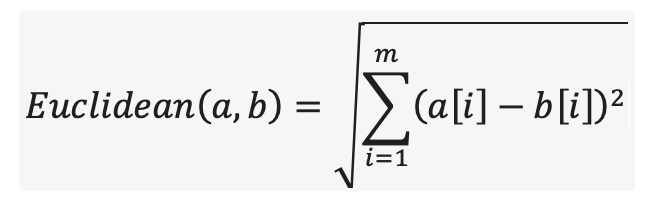


In [438]:
# function to calculate the euclidean distance between two data points

def euclidean_distance(a,b):
    return np.sqrt(np.sum((np.array(a) - np.array(b)) ** 2))

In [439]:
# function to calculate euclidean distance between a test point and all training points

def euclidean_distance_all(X_train, test_data): 
    distances = []
    
    for row in range(len(X_train)):
        current_train_data = X_train[row]
        current_distance = 0
       
        for col in range(len(current_train_data)):
           current_distance += (current_train_data[col] - test_data[col])**2
        current_distance = np.sqrt(current_distance)
        
        distances.append(current_distance)
 
    distances = pd.DataFrame(distances, columns=['Distance']) # convert to dataframe all the distances
    return distances
   

#### 4. Define a function to find the K nearest neighbors to a given data point based on Euclidean distance.

In [440]:
# function to get the k nearest neighbors based on the euclidean distance
# note that output from euclidean_distance_all is used as input to this function

def nearest_neighbors(distances, k):
    nearest_neighbor = distances.sort_values(by=['Distance'],axis=0)[:k]
    return nearest_neighbor

#### 5. Define a function to predict the class label of a data point by majority vote of its K nearest neighbors.

In [441]:
# function to get the majority class label from the k nearest neighbors using majority voting and return the predicted class label
# note that output from nearest_neighbors is used as input to this function

def majority_voting(nearest_neighbors, y_train):
    counter_vote = Counter(y_train[nearest_neighbors.index])
    y_pred = counter_vote.most_common()[0][0]
    
    return y_pred
   

#### 6. Write code to test your KNN classifier on the sample dataset using k=3, predicting the class label foreach data point.

In [442]:
# KNN function from scratch by combining all the above functions
# note that the function takes in the training data, test data, and k as input and returns the predicted class labels

def custom_KNN(X_train, y_train, test_data, k):
    y_pred = []
    for X_test_point in test_data:
        distances = euclidean_distance_all(X_train, X_test_point)
        nearest_neighbor = nearest_neighbors(distances, k)
        y_pred.append(majority_voting(nearest_neighbor, y_train))
        
    return y_pred


In [443]:
# testing this custom KNN on k =3

k = 3
y_pred_test = custom_KNN(X_train.values, y_train.values, X_test.values, k)
print(y_pred_test)

[0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0]


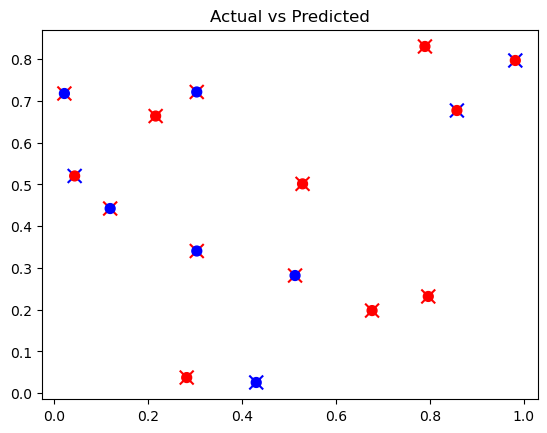

In [444]:
# plot the actual test values and predicted values of same figure, marking the right predictions with 'o' and wrong predictions with 'x'

plt.scatter(X_test['Feature1'], X_test['Feature2'], c=y_test, cmap='bwr', marker='x', s=100)
plt.scatter(X_test['Feature1'], X_test['Feature2'], c=y_pred_test, cmap='bwr', marker='o',  s=50)
plt.title('Actual vs Predicted')
plt.show()


#### 7. Calculate the accuracy of the model by comparing predicted labels to the actual labels.

In [445]:
# to calculate the accuracy of the model

accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy of the model is: ", accuracy)

Accuracy of the model is:  0.4666666666666667


In [446]:
# checking the confusion matrix

conf_matrix_custom = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix: \n", conf_matrix_custom)

Confusion Matrix: 
 [[1 3]
 [5 6]]


In [447]:
# checking the classification report
class_report_custom = classification_report(y_test, y_pred_test)
print(class_report_custom)

              precision    recall  f1-score   support

           0       0.17      0.25      0.20         4
           1       0.67      0.55      0.60        11

    accuracy                           0.47        15
   macro avg       0.42      0.40      0.40        15
weighted avg       0.53      0.47      0.49        15



In [448]:
# Check by using sklearn classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred_sklearn = knn.predict(X_test)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print("Accuracy of the model using sklearn is: ", accuracy_sklearn)

Accuracy of the model using sklearn is:  0.4666666666666667


In [449]:
# Checking for the prediction array if equal with both the custom and Sklearn Knn
print(np.array_equal(y_pred_test, y_pred_sklearn))

True


#### 8. Experiment with different values of k to see impact on accuracy. How does k affect modelperformance?

In [450]:
# Testing with k = 4
# Accurancy is decreased with k =4
k = 4
y_pred_test = custom_KNN(X_train.values, y_train.values, X_test.values, k)
print(y_pred_test)  

accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy of the model is: ", accuracy)

[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0]
Accuracy of the model is:  0.5333333333333333


In [451]:
# Testing with k = 5
# looks to be the best value of K =5, which gives the highest accuracy
k = 5
y_pred_test = custom_KNN(X_train.values, y_train.values, X_test.values, k)
print(y_pred_test)  

accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy of the model is: ", accuracy)


[0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0]
Accuracy of the model is:  0.4


In [452]:
# Testing with k = 10
k = 10
y_pred_test = custom_KNN(X_train.values, y_train.values, X_test.values, k)
print(y_pred_test)  

accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy of the model is: ", accuracy)

[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0]
Accuracy of the model is:  0.6666666666666666


In [453]:
# Testing with k = 18
k = 18
y_pred_test = custom_KNN(X_train.values, y_train.values, X_test.values, k)
print(y_pred_test)  

accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy of the model is: ", accuracy)

[0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]
Accuracy of the model is:  0.6


In [454]:
# Testing with k = 29
k = 29
y_pred_test = custom_KNN(X_train.values, y_train.values, X_test.values, k)
print(y_pred_test)  

accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy of the model is: ", accuracy)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Accuracy of the model is:  0.7333333333333333


In [455]:
# Accuracy with different values of k = 1 to 30
for k in range(1, 31):
    y_pred_test = custom_KNN(X_train.values, y_train.values, X_test.values, k)
    print(f"k = {k}: {y_pred_test}")
    accuracy = accuracy_score(y_test, y_pred_test)
    print(f"k = {k}: Accuracy = {accuracy}")

k = 1: [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1]
k = 1: Accuracy = 0.7333333333333333
k = 2: [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1]
k = 2: Accuracy = 0.7333333333333333
k = 3: [0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0]
k = 3: Accuracy = 0.4666666666666667
k = 4: [0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0]
k = 4: Accuracy = 0.5333333333333333
k = 5: [0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0]
k = 5: Accuracy = 0.4
k = 6: [0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0]
k = 6: Accuracy = 0.5333333333333333
k = 7: [1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0]
k = 7: Accuracy = 0.5333333333333333
k = 8: [0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0]
k = 8: Accuracy = 0.6
k = 9: [1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0]
k = 9: Accuracy = 0.4666666666666667
k = 10: [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0]
k = 10: Accuracy = 0.6666666666666666
k = 11: [1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0]
k = 11: Accuracy = 0.5333333333333333
k = 12: [0, 0, 1, 1, 1, 0, 0, 1, 1, 

In [456]:
# experiment with different values of k using sklearn KNN classifier
for k in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_sklearn = knn.predict(X_test)
    accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
    print(f"k = {k}: Accuracy = {accuracy_sklearn}")

k = 1: Accuracy = 0.7333333333333333
k = 2: Accuracy = 0.6
k = 3: Accuracy = 0.4666666666666667
k = 4: Accuracy = 0.4666666666666667
k = 5: Accuracy = 0.4
k = 6: Accuracy = 0.4666666666666667
k = 7: Accuracy = 0.5333333333333333
k = 8: Accuracy = 0.4
k = 9: Accuracy = 0.4666666666666667
k = 10: Accuracy = 0.4
k = 11: Accuracy = 0.5333333333333333
k = 12: Accuracy = 0.3333333333333333
k = 13: Accuracy = 0.6
k = 14: Accuracy = 0.3333333333333333
k = 15: Accuracy = 0.4666666666666667
k = 16: Accuracy = 0.3333333333333333
k = 17: Accuracy = 0.4666666666666667
k = 18: Accuracy = 0.4
k = 19: Accuracy = 0.6666666666666666
k = 20: Accuracy = 0.4666666666666667
k = 21: Accuracy = 0.6666666666666666
k = 22: Accuracy = 0.6
k = 23: Accuracy = 0.7333333333333333
k = 24: Accuracy = 0.4
k = 25: Accuracy = 0.6666666666666666
k = 26: Accuracy = 0.6666666666666666
k = 27: Accuracy = 0.6
k = 28: Accuracy = 0.6
k = 29: Accuracy = 0.7333333333333333
k = 30: Accuracy = 0.8


The model's performance with different values of k is discussed here below.

#### 9. Submit your Python code file and briefly document your accuracy results and observations fordifferent k values.

1. As the value of K increases, the accuracy tends to decrease or reaching consistent after a certain value of K
2. We see that the highest accuracy came at k = 5 i.e 0.733. This tells us that k =5 can be the best selection for nearest neighbors as it is providing the best balance bias and variance.
3. Note: In KNN, there is always a trade off when selecting a best value of K. If we set the value of K too low, we run the risk of our model being sensitive to noise in the data and can result in overfitting. However, if we set value of k too high, we run the risk of losing the true patterns in the data and may result in underfitting. The most common way to tackle this situation and select a best value of k is by performing the model evaluation of different value of k, and choose the one which performs the best.
4. After the k value = 5, we see that accuracy tends to remains constant for the larger values of k. This signifies that increasing the value of k after a certain point, does not improves the classifier's performance, rather it may lead to worse performance as increasing the value of k after that point could be oversmoothening the performance. 
5. One Important observation to note here, after k = 15, all the predictions returned are same and that is class 1. Why? 
Answer: After splitting the dataset in training and test we see that y_train which contains only the target valriable i.e c"class" here. It is distributed as 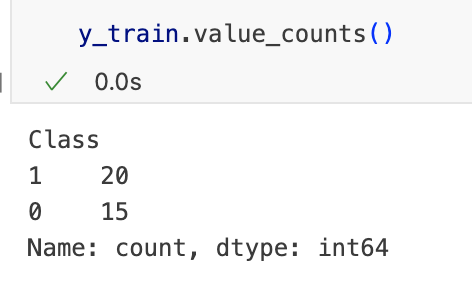  counts for class 1 = 20, and counts for class 0 = 15. So if you set the value of k = 15 or more, no matter how far the new value will be, it will always return class = 1 as it is including all the points from one class, and class 1 is greater than class 0, so it will always return 1, no matter what. 
6. If we see accuracy with k =1 which is 53.33%, which is low as compared to other values of k. This could be due to the model overfitting to the training data when it is considering only one nrearest neighbor.
7. It is quite clear here, that choice of k has an significant impact on the performance of the classifier. It is very important to choose value of k that finds the perfect balance between bias and variance and perform well on an unseen data.

## Part 2: Perform and Evaluate KNN on the Iris flower dataset using scikit-learn library

#### 1. Load Iris dataset . It contains 150 total examples with 4 numeric features. The data has 3 balancedtarget classes of Iris species

#### 2. Use built-in to scikit-learn Python library, so no need to source data separately

In [457]:
# importing the library for iris dataset and for KNN classifier

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

In [458]:
iris = load_iris()

In [459]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [460]:
iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
display(iris_df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [461]:
iris_df['target'].unique()

array([0., 1., 2.])

In [462]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [463]:
iris_df.shape   


(150, 5)

In [464]:
(iris_df['target'] == 0).sum()

50

In [465]:
(iris_df['target'] == 1).sum()

50

In [466]:
(iris_df['target'] == 2).sum()

50

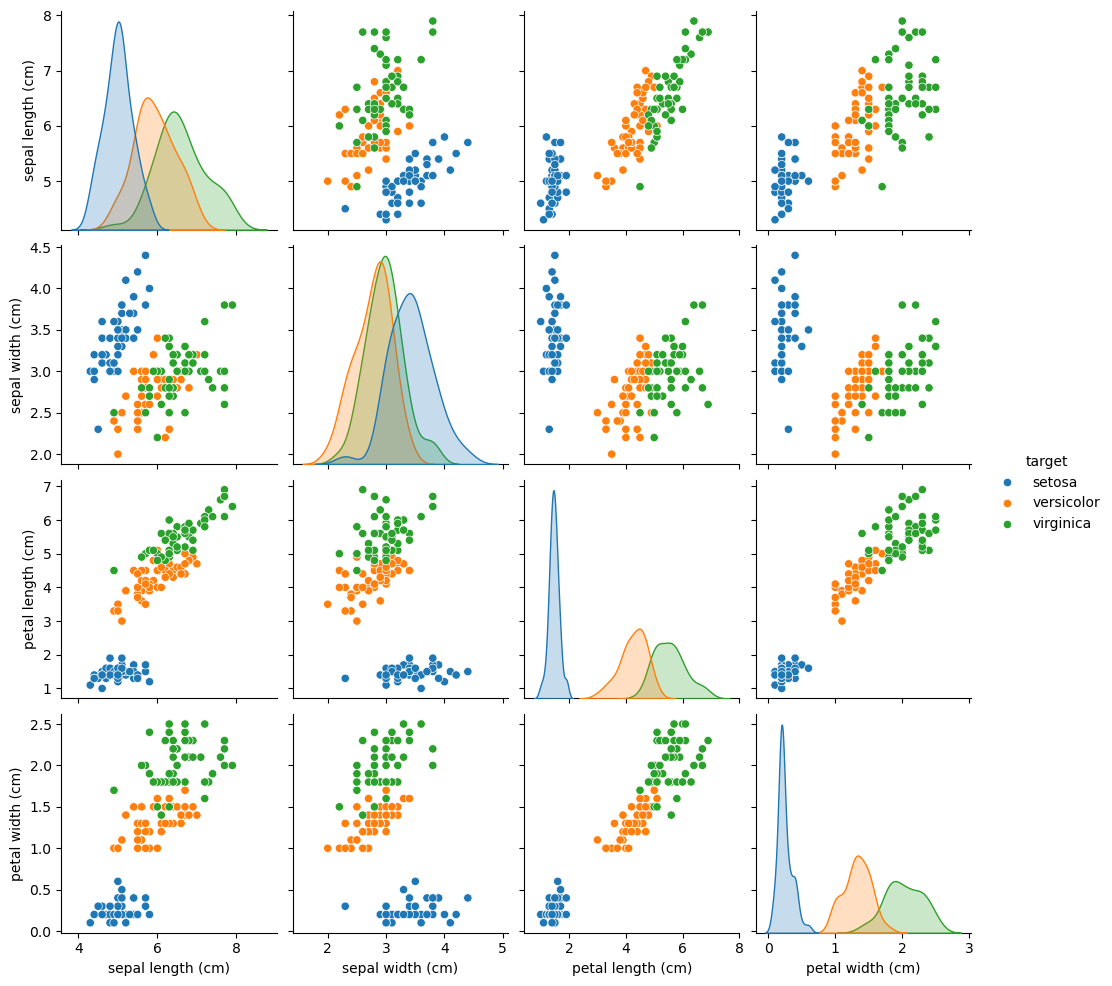

In [467]:
# visualise this iris datset
iris_df2 = iris_df.copy()
iris_df2['target'] = iris_df2['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
sns.pairplot(iris_df2, hue='target')

#### 3. Follow the steps 7-9 from part I to work on this Part 2 assignment

In [468]:
# Split the data into training and test sets
X_iris = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y_iris = iris_df['target']

X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_iris, y_iris, test_size=0.2, shuffle= True, random_state=0)

In [469]:
# using sckit learn KNN classifier to build the model

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_i, y_train_i)
y_pred = knn.predict(X_test_i)
print(y_pred)



[2. 1. 0. 2. 0. 2. 0. 1. 1. 1. 2. 1. 1. 1. 2. 0. 1. 1. 0. 0. 2. 1. 0. 0.
 2. 0. 0. 1. 1. 0.]


In [470]:
# using the custom KNN to build the model

custom_knn = custom_KNN(X_train_i.values, y_train_i.values, X_test_i.values, 3)
y_pred_custom = np.array(custom_knn)
print(y_pred_custom)


[2. 1. 0. 2. 0. 2. 0. 1. 1. 1. 2. 1. 1. 1. 2. 0. 1. 1. 0. 0. 2. 1. 0. 0.
 2. 0. 0. 1. 1. 0.]


#### Calculate the accuracy of the model by comparing predicted labels to the actual labels.

In [471]:
# checking the accuracy of the model using sklearn KNN classifier
accuracy = accuracy_score(y_test_i, y_pred)
print("Accuracy of the model is: ", accuracy)

Accuracy of the model is:  0.9666666666666667


In [472]:
# checking the accuracy of the model using custom KNN classifier
accuracy_custom = accuracy_score(y_test_i, y_pred_custom)
print("Accuracy of the model is: ", accuracy_custom)

Accuracy of the model is:  0.9666666666666667


#### Experiment with different values of k to see impact on accuracy. How does k affect modelperformance? 

In [473]:
# for k = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_i, y_train_i)
y_pred = knn.predict(X_test_i)

accuracy = accuracy_score(y_test_i, y_pred)
print("Accuracy of the model is: ", accuracy)

Accuracy of the model is:  0.9666666666666667


In [474]:
# checking confusion matrix

conf_matrix = confusion_matrix(y_test_i, y_pred)
print(conf_matrix)

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [475]:
# now checking the classification report    

class_report = classification_report(y_test_i, y_pred)
print(class_report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      0.92      0.96        13
         2.0       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [476]:
# for k = 21
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train_i, y_train_i)
y_pred = knn.predict(X_test_i)

accuracy = accuracy_score(y_test_i, y_pred)
print("Accuracy of the model is: ", accuracy)

Accuracy of the model is:  1.0


In [477]:
# for values of k = 1 to 30
for k in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_i, y_train_i)
    y_pred = knn.predict(X_test_i)
    accuracy = accuracy_score(y_test_i, y_pred)
    print(f"k = {k}: Accuracy = {accuracy}")

k = 1: Accuracy = 1.0
k = 2: Accuracy = 0.9666666666666667
k = 3: Accuracy = 0.9666666666666667
k = 4: Accuracy = 1.0
k = 5: Accuracy = 0.9666666666666667
k = 6: Accuracy = 1.0
k = 7: Accuracy = 1.0
k = 8: Accuracy = 1.0
k = 9: Accuracy = 1.0
k = 10: Accuracy = 1.0
k = 11: Accuracy = 1.0
k = 12: Accuracy = 1.0
k = 13: Accuracy = 1.0
k = 14: Accuracy = 1.0
k = 15: Accuracy = 1.0
k = 16: Accuracy = 1.0
k = 17: Accuracy = 1.0
k = 18: Accuracy = 1.0
k = 19: Accuracy = 1.0
k = 20: Accuracy = 1.0
k = 21: Accuracy = 1.0
k = 22: Accuracy = 1.0
k = 23: Accuracy = 1.0
k = 24: Accuracy = 1.0
k = 25: Accuracy = 1.0
k = 26: Accuracy = 0.9666666666666667
k = 27: Accuracy = 0.9333333333333333
k = 28: Accuracy = 0.9666666666666667
k = 29: Accuracy = 0.9666666666666667
k = 30: Accuracy = 0.9666666666666667


In [478]:
# for all values of k = 1 to 30 using the custom KNN
for k in range(1, 31):
    y_pred_custom = custom_KNN(X_train_i.values, y_train_i.values, X_test_i.values, k)
    accuracy_custom = accuracy_score(y_test_i, y_pred_custom)
    print(f"k = {k}: Accuracy = {accuracy_custom}")

k = 1: Accuracy = 1.0
k = 2: Accuracy = 1.0
k = 3: Accuracy = 0.9666666666666667
k = 4: Accuracy = 1.0
k = 5: Accuracy = 0.9666666666666667
k = 6: Accuracy = 1.0
k = 7: Accuracy = 1.0
k = 8: Accuracy = 1.0
k = 9: Accuracy = 1.0
k = 10: Accuracy = 1.0
k = 11: Accuracy = 1.0
k = 12: Accuracy = 1.0
k = 13: Accuracy = 1.0
k = 14: Accuracy = 1.0
k = 15: Accuracy = 1.0
k = 16: Accuracy = 1.0


k = 17: Accuracy = 1.0
k = 18: Accuracy = 1.0
k = 19: Accuracy = 1.0
k = 20: Accuracy = 1.0
k = 21: Accuracy = 1.0
k = 22: Accuracy = 1.0
k = 23: Accuracy = 1.0
k = 24: Accuracy = 1.0
k = 25: Accuracy = 1.0
k = 26: Accuracy = 1.0
k = 27: Accuracy = 0.9666666666666667
k = 28: Accuracy = 0.9666666666666667
k = 29: Accuracy = 0.9666666666666667
k = 30: Accuracy = 0.9666666666666667


The model's performance with different values of k is discussed here below.

#### Submit your Python code file and briefly document your accuracy results and observations fordifferent k values.

1. Accuracy when k = 1 is 100%, telling us that each data point is correctly classified based on its nearest neighbor which is 1 here. However, model achieving perfect accuracy indicates the potential overfiting.
2. For smaller values of k = 2,3,4,5 the accuracy is 96.66%, which indicates towards the accurate predictions on the test dataset. 
3. Further, we see that as the value of k gets larger i.e k >= 6, the accurancy remaains constant at 100%, which tells us that after a certain point of k , k does not improve the performance of classifier as the nearest neighbor may start to include more distant points which does not contribute to the decision.
4. After k >= 26, the accuracy starts to decrease slightly, which could be due to the datapoints which are noisy are getting included as neighbors which is further leading to misclasification.
5. The Iris datset have well seperated equally distributed classes, due to which KNN algorithm is performing better giving the higher accuracy results. 
 

#### Thank You!!